# Conjunto de dados 1

Esses dados consistem do número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, em cada uma das 210 categorias que o Facebook atribui a cada página

Cada linha de spatial é um usuário e cada coluna é uma categoria.

In [1]:
import numpy as np
from math import isclose
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# loading the spatial dataset as a numpy array

data = np.loadtxt('data/social/data/spatial_data.txt')
spatial = data[:,1:]
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.DataFrame(spatial)

In [3]:
# standardizing the data matrix to make the use of PCA possible
# (in each column, mean = 0 and standard deviation = 1)

std_spatial = StandardScaler().fit_transform(spatial)
# pd.DataFrame(std_spatial).head(10)

In [4]:
# applying the PCA algorithm to give the normal subspace matrix which is 8982 x 5.
# this allows the points of the user behavior matrix (X) to be projected into the normal subspace,
# and it gives us the normal behavior portion. subtracting the normal behavior portion from X, we get
# the residual portion of user behavior.

pca = PCA(n_components=5)
pca.fit(std_spatial)
normal_subspace = pca.components_.T             # transposing because PCA in sklearn makes each eigenvector become a line instead of a column.
normal_behavior_portion = (np.matmul(np.matmul(normal_subspace, normal_subspace.T), std_spatial.T)).T
residual_behavior_portion = std_spatial - normal_behavior_portion

# 210x5 5x210 210x8982 ?????

# pd.DataFrame(normal_subspace)
# pd.DataFrame(normal_behavior_portion).head(10)
pd.DataFrame(residual_behavior_portion).head(10)
# pd.DataFrame(normal_subspace).head(10)

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.024062,0.014813,-0.040590,-0.075436,-0.013227,-0.259152,-0.047572,-0.221171,-0.254363,-0.016215,...,-0.080264,-0.044595,0.016043,-0.120096,4.152388,-0.030927,-0.127308,-0.052278,-0.061979,-0.118972
1,-0.004714,0.032037,-0.003317,-0.004563,0.009465,-0.065693,-0.026922,-0.036843,0.034435,-0.016542,...,-0.010450,-0.007904,0.021608,-0.006541,-0.002073,0.001682,0.007930,-0.014170,-0.015464,-0.017716
2,-0.478679,0.362227,-1.022284,0.309108,0.476629,-1.062116,0.855720,-0.646520,3.931154,-0.011991,...,-0.367307,-0.047608,-0.761077,-0.556987,-0.794389,-0.533215,-1.052706,-0.186134,1.235599,-0.211580
3,-0.006357,0.031034,-0.003668,-0.004706,0.001472,-0.072787,-0.026892,-0.038350,0.031194,-0.016526,...,-0.011590,-0.007497,-0.002534,-0.003394,-0.002566,0.003507,0.011518,-0.011467,-0.023526,-0.021588
4,-0.007037,0.023024,-0.013322,0.006298,0.005024,-0.065945,0.257370,-0.034930,0.042003,-0.016484,...,-0.009287,-0.007133,-0.012750,-0.010214,-0.003118,-0.002921,0.004619,-0.017060,-0.019386,-0.004972
5,0.001381,0.032601,0.000770,0.009100,0.011427,-0.067687,-0.022488,-0.039389,0.031055,-0.016565,...,-0.010625,-0.008299,-0.001129,-0.006002,-0.002881,0.003579,0.010549,-0.014069,-0.014460,-0.006937
6,-0.019234,0.027234,-0.042748,-0.008865,-0.017009,-0.079571,-0.064920,-0.044617,0.030350,-0.016362,...,-0.015240,-0.007774,-0.048676,-0.027926,-0.020545,-0.020154,-0.025746,-0.025401,-0.037060,0.160734
7,-0.010154,0.024608,-0.044405,0.011282,0.008560,0.232215,-0.068133,-0.039546,0.044856,-0.016399,...,-0.010413,-0.008767,-0.031602,-0.039678,-0.019451,-0.027335,-0.036586,-0.035974,-0.011725,0.014134
8,-0.009276,0.025767,-0.004016,-0.013616,-0.010710,0.197161,-0.026406,-0.047581,0.014617,-0.016482,...,-0.016042,-0.008422,0.027094,-0.001490,-0.006963,0.006694,0.014366,-0.007609,-0.037466,0.051888
9,0.001359,0.033587,-0.000244,0.010141,0.008302,-0.070632,-0.023126,-0.040927,0.028551,-0.016561,...,-0.011408,-0.008320,-0.001896,-0.006194,-0.004385,0.003297,0.009802,-0.013847,-0.017403,-0.007267


In [5]:
# calculating the l2 norm of each line in the residual behavior portion matrix.
# the l2 norm is the squared root of the sum of squares of each element in a vector.
# this value, along with a given threshold, is what makes possible to detect anomalous users.

individual_norms = np.sqrt(np.sum(np.power(residual_behavior_portion, 2), axis = 1))

# pd.DataFrame(individual_norms).head(10)
# individual_norms = sorted(individual_norms, reverse = False)
# pd.DataFrame(sorted(individual_norms, reverse=True))
# pd.DataFrame(np.argsort(-individual_norms))

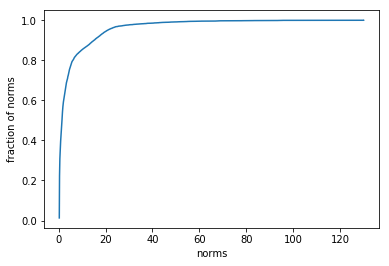

In [6]:
# plotting the ECDF (empirical cumulative distribution function) of the norms matrix.
# this gives us a graph with y corresponding to the threshold
# it will be selected as a value which will classify 3% of users as anomalous.
# some of the code is from https://www.codementor.io/kripanshubharga/calculate-ecdf-in-python-gycltzxi3

x_values = np.linspace(start=min(individual_norms), stop=max(individual_norms), num=len(individual_norms))
data_size = individual_norms.size

y_values = []
for i in x_values:
    temp = individual_norms[individual_norms <= i]
    value = temp.size / data_size
    y_values.append(value)

plt.plot(x_values, y_values)
plt.xlabel('norms')
plt.ylabel('fraction of norms')
plt.show()


In [7]:
# here we check if a certain norm has the value ecdf(norm) close to 0.97
# which was the determined, since we know 3% of users are anomalous.

ecdf = ECDF(individual_norms)
threshold = 0
for norm in individual_norms:
    if isclose(ecdf(norm), 0.97, abs_tol=1e-4):
        threshold = norm

print(threshold)
print(ecdf(threshold))

25.429487190728295
0.9699398797595191


In [8]:
# and finally, showing the anomalous users. job's done 😂👌

anomalous_users = []
normal_users = []
for ind,user_norm in enumerate(individual_norms):
    if user_norm >= threshold:
        anomalous_users.append([ind,user_norm])
    else:
        normal_users.append([ind,user_norm])


df = pd.DataFrame(anomalous_users)
df.columns = ['user #', 'residual behavior portion']
df.head(10)

,user #,residual behavior portion
0,52,57.270275
1,86,37.709654
2,117,35.722908
3,184,38.997806
4,217,42.417956
5,259,54.060443
6,301,28.266212
7,303,27.110607
8,349,37.750567
9,388,29.901535


# Conjunto de dados 2

Esses dados contém o número de 'Likes' para cada um dos 9000 usuários, ao longo de 6 meses, agregados diariamente.

Linhas de FBTemporal são usuários e colunas são dias.

In [9]:
temporal_data = np.loadtxt('data/social/data/temporal_data.txt')
temporal = temporal_data[:,1:]
pd.DataFrame(temporal[:,:]).head(10)

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
std_temporal = StandardScaler().fit_transform(temporal)

# pd.DataFrame(std_temporal)

In [11]:
pca = PCA(n_components=5)
pca.fit(std_temporal)
normal_subspace = pca.components_.T             # transposing because PCA in sklearn makes each eigenvector become a line instead of a column.
normal_behavior_portion = (np.matmul(np.matmul(normal_subspace, normal_subspace.T), std_temporal.T)).T
residual_behavior_portion = std_temporal - normal_behavior_portion

pd.DataFrame(residual_behavior_portion).head(10)

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,-0.058124,-0.043919,-0.034374,-0.061983,-0.047818,-0.019546,-0.034047,-0.014243,-0.000973,-0.014665,...,-0.051539,0.341612,-0.054196,-0.037078,-0.037035,-0.080456,-0.063179,-0.040206,-0.033506,-0.037133
1,-0.019982,-0.000820,0.001734,-0.027511,-0.006326,0.144879,0.000104,0.018663,0.028076,0.005079,...,-0.012910,-0.022653,-0.021432,-0.019568,-0.020563,-0.014181,-0.020849,-0.029976,-0.024237,-0.025769
2,-0.020788,-0.001637,0.001558,-0.028755,-0.007380,0.013981,0.000055,0.019396,0.029750,0.004213,...,-0.013433,-0.022400,-0.020947,-0.016785,-0.017202,-0.015559,-0.021357,-0.026293,-0.021582,-0.023750
3,-0.027865,-0.009152,-0.006200,-0.034659,-0.013963,0.009659,-0.007405,0.270705,0.022995,0.001838,...,-0.013513,-0.022637,-0.020930,-0.016232,-0.016533,-0.016384,-0.021678,-0.025390,-0.021029,-0.023310
4,-0.018812,-0.000483,0.002117,-0.026817,-0.005108,0.016028,0.001510,0.020403,0.030113,0.007168,...,-0.010562,-0.019464,-0.018468,-0.015569,-0.016569,-0.011902,-0.018462,-0.025810,-0.020450,-0.022951
5,0.268829,-0.040005,-0.035971,-0.067544,-0.048974,-0.013510,-0.046161,-0.022050,-0.007277,-0.020577,...,-0.011821,-0.021469,-0.018811,-0.016505,-0.016311,-0.012160,-0.020692,-0.025526,-0.020211,-0.023821
6,-0.023423,-0.007001,-0.003961,-0.030071,-0.009490,0.012301,-0.002026,0.016349,0.026006,0.007298,...,-0.015949,-0.025701,-0.023098,-0.017306,-0.018267,-0.022276,-0.024450,-0.026361,-0.021245,-0.023935
7,-0.023921,-0.006282,-0.003363,-0.031273,-0.010380,0.012036,-0.003893,0.014942,0.024723,0.005253,...,-0.013215,-0.022977,-0.020971,-0.017812,-0.019082,-0.016754,-0.021544,-0.027844,-0.021782,-0.024484
8,-0.023714,-0.005370,-0.002654,-0.031176,-0.010082,0.012441,-0.003937,0.015124,0.025025,0.004539,...,-0.011849,-0.021337,-0.019838,-0.017287,-0.018401,-0.013897,-0.019994,-0.027505,-0.021690,-0.024162
9,-0.018182,0.000649,0.003077,-0.026057,-0.004325,0.016514,0.002230,0.021064,0.030712,0.006869,...,-0.010550,-0.019408,-0.018684,-0.015979,-0.016794,-0.011212,-0.018324,-0.026227,-0.021187,-0.023238


In [12]:
individual_norms = np.sqrt(np.sum(np.power(residual_behavior_portion, 2), axis = 1))

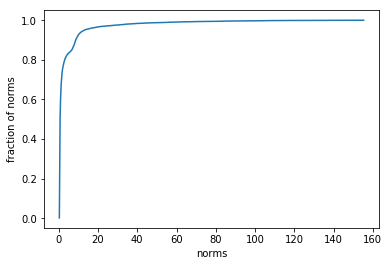

In [13]:
x_values = np.linspace(start=min(individual_norms), stop=max(individual_norms), num=len(individual_norms))
data_size = individual_norms.size

y_values = []
for i in x_values:
    temp = individual_norms[individual_norms <= i]
    value = temp.size / data_size
    y_values.append(value)

plt.plot(x_values, y_values)
plt.xlabel('norms')
plt.ylabel('fraction of norms')
plt.show()

In [14]:
ecdf = ECDF(individual_norms)
threshold = 0
for norm in individual_norms:
    if isclose(ecdf(norm), 0.97, abs_tol=1e-4):
        threshold = norm

print(threshold)
print(ecdf(threshold))

23.490652050028917
0.9699913644214163


In [15]:
anomalous_users = []
normal_users = []
for ind,user_norm in enumerate(individual_norms):
    if user_norm >= threshold:
        anomalous_users.append([ind,user_norm])
    else:
        normal_users.append([ind,user_norm])


df = pd.DataFrame(anomalous_users)
df.columns = ['user #', 'residual behavior portion']
df

,user #,residual behavior portion
0,55,39.398175
1,88,102.621554
2,122,30.529471
3,155,31.297862
4,211,58.842516
5,214,39.691138
6,281,82.932116
7,310,36.006816
8,318,28.484882
9,320,66.911475
